In [ ]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'..\data\HR_capstone_dataset.csv')

## Data Exploration

Como eu n√£o conhe√ßo o dataset, vou fazer uma explora√ß√£o inicial para entender melhor os dados.
Passos:

1. Carregar o dataset.
2. Verificar as primeiras linhas.
3. Verificar o tipo de dados de cada coluna (Para um poss√≠vel modelo de previs√£o, √© importante que as colunas de interesse estejam no formato num√©rico).
4. Verificar se h√° valores ausentes, dependendo do modelo de previs√£o, pode ser necess√°rio lidar com esses valores.
5. Verificar distribui√ß√µes, outliers e correla√ß√µes entre as vari√°veis.

In [4]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Primeiras impress√µes

1. Aparentemente minha vari√°vel alvo ser√° a coluna `left` que significa se o funcion√°rio deixou a empresa ou n√£o.
## Descri√ß√£o das Vari√°veis

### Vari√°veis Num√©ricas
- **satisfaction_level**: N√≠vel de satisfa√ß√£o do funcion√°rio
- **last_evaluation**: √öltima avalia√ß√£o de desempenho
- **number_project**: N√∫mero de projetos atribu√≠dos
- **average_montly_hours**: M√©dia de horas mensais trabalhadas
- **time_spend_company**: Tempo na empresa (anos)

### Vari√°veis Bin√°rias
- **Work_accident**: Se teve acidente de trabalho (0/1)
- **left**: Se deixou a empresa (vari√°vel alvo)
- **promotion_last_5years**: Se teve promo√ß√£o nos √∫ltimos 5 anos (0/1)

### Vari√°veis Categ√≥ricas
- **Department**: Departamento do funcion√°rio
- **salary**: N√≠vel salarial (low, medium, high)

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Como a maioria das colunas est√£o no formato num√©rico, as √∫nicas que precisarei lidar ser√£o as colunas `Department` e `salary`, que s√£o categ√≥ricas. Mas isso ser√° feito mais adiante, quando eu for preparar os dados para o modelo de previs√£o.

In [7]:
data.shape
# Como cada linha representa um funcion√°rio, h√° 14999 respostas nessa pesquisa.

(14999, 10)

In [8]:
#Ferramentas para visualiza√ß√£o
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='salary', ylabel='satisfaction_level'>

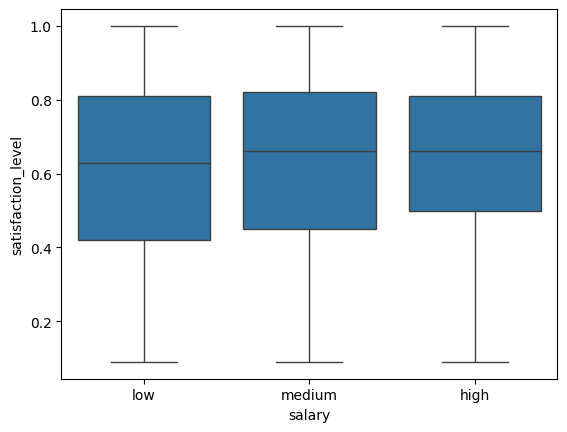

In [9]:
sns.boxplot(x='salary', y='satisfaction_level', data=data)

A primeira vista, a satisfa√ß√£o n√£o parece ser muito afetada pelo n√≠vel de sal√°rio. Suas m√©dias est√£o pr√≥ximas.

<Axes: xlabel='left', ylabel='satisfaction_level'>

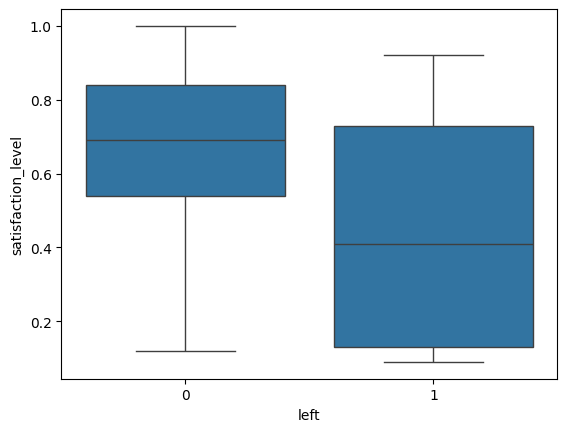

In [10]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

√â bem aparente que o n√≠vel de satisfa√ß√£o √© diferente entre as pessoas que sa√≠ram da empresa e as que n√£o sa√≠ram. A m√©dia de satisfa√ß√£o das pessoas que sa√≠ram √© bem menor do que a das que ficaram.
O que talvez j√° fosse de se esperar, mas √© interessante ver isso nos dados.

In [11]:
sns.set_theme(style="whitegrid")

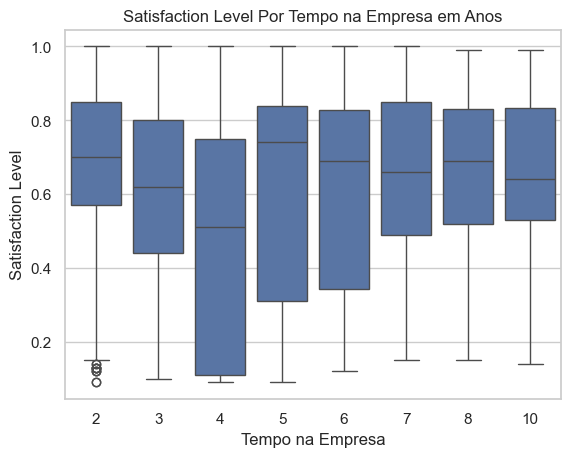

In [12]:
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=data)
plt.title('Satisfaction Level Por Tempo na Empresa em Anos')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Satisfaction Level')
plt.show()

Vamos dar uma olhada mais aprofundada nesses funcion√°rios que est√£o h√° 4 anos na empresa. E tentar entender melhor o que pode ter levado eles a ter uma impress√£o pior da empresa.

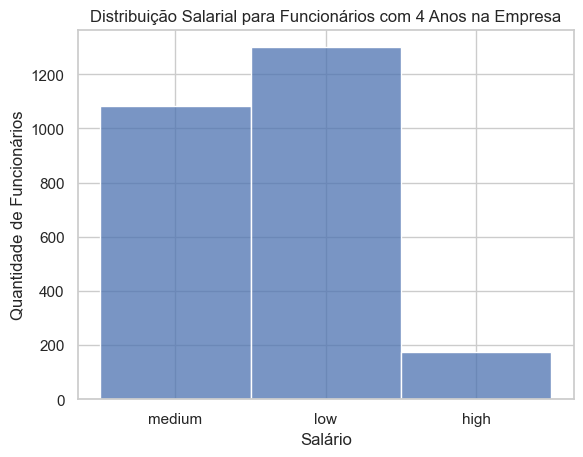

In [13]:
sns.histplot(data=data[data['time_spend_company'] == 4], x='salary', stat='count')
plt.title('Distribui√ß√£o Salarial para Funcion√°rios com 4 Anos na Empresa')
plt.xlabel('Sal√°rio')
plt.ylabel('Quantidade de Funcion√°rios')
plt.show()

Pode se perceber que os funcion√°rios que est√£o h√° 4 anos na empresa possuem ou possu√≠am sal√°rios baixos ou m√©dios. Isso pode ser um indicativo de que esses funcion√°rios n√£o est√£o satisfeitos com o sal√°rio e isso pode ter influenciado na sua decis√£o de sair da empresa.

In [14]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

#### Dado a diferen√ßa na satisfa√ß√£o dos funcion√°rios com 4 anos de empresa, quero comparar algumas vari√°veis entre os funcion√°rios que t√™m 4 anos de empresa e os demais.

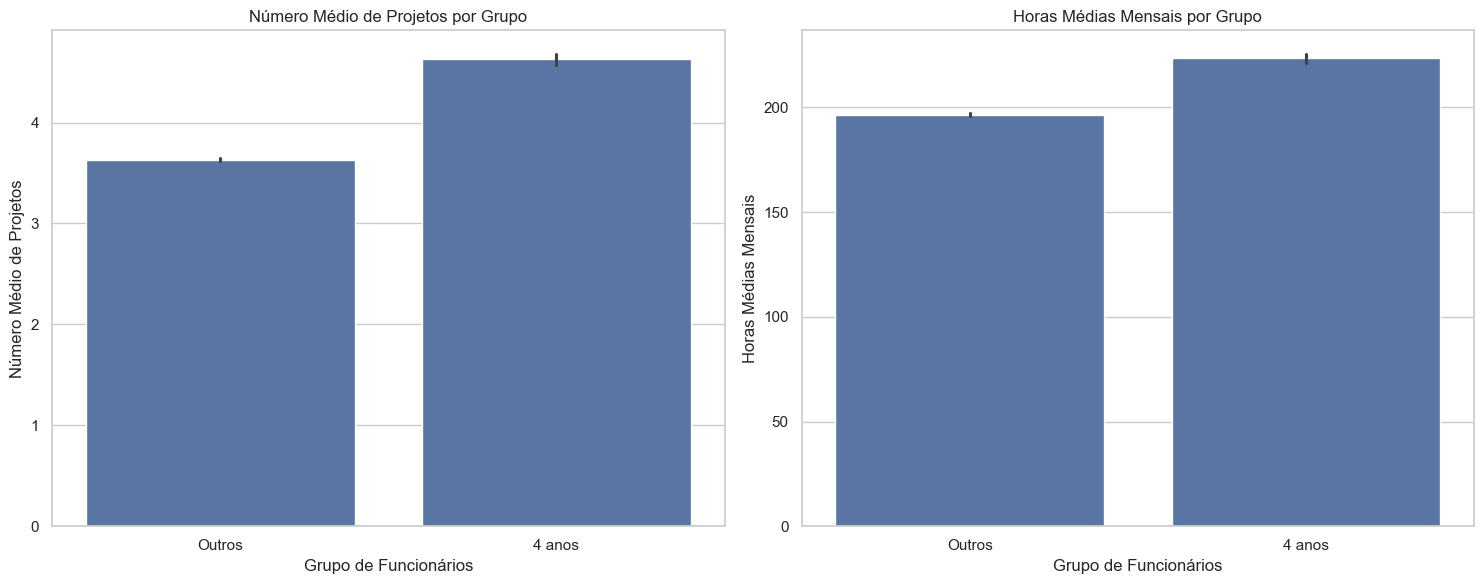

In [15]:
# Criar uma nova coluna para categorizar os funcion√°rios
data['group_4_years'] = data['time_spend_company'].apply(lambda x: '4 anos' if x == 4 else 'Outros')

# Criar subplots para comparar as duas m√©tricas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: N√∫mero m√©dio de projetos
sns.barplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('N√∫mero M√©dio de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcion√°rios')
axes[0].set_ylabel('N√∫mero M√©dio de Projetos')

# Gr√°fico 2: Horas m√©dias trabalhadas
sns.barplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Horas M√©dias Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcion√°rios')
axes[1].set_ylabel('Horas M√©dias Mensais')

plt.tight_layout()
plt.show()

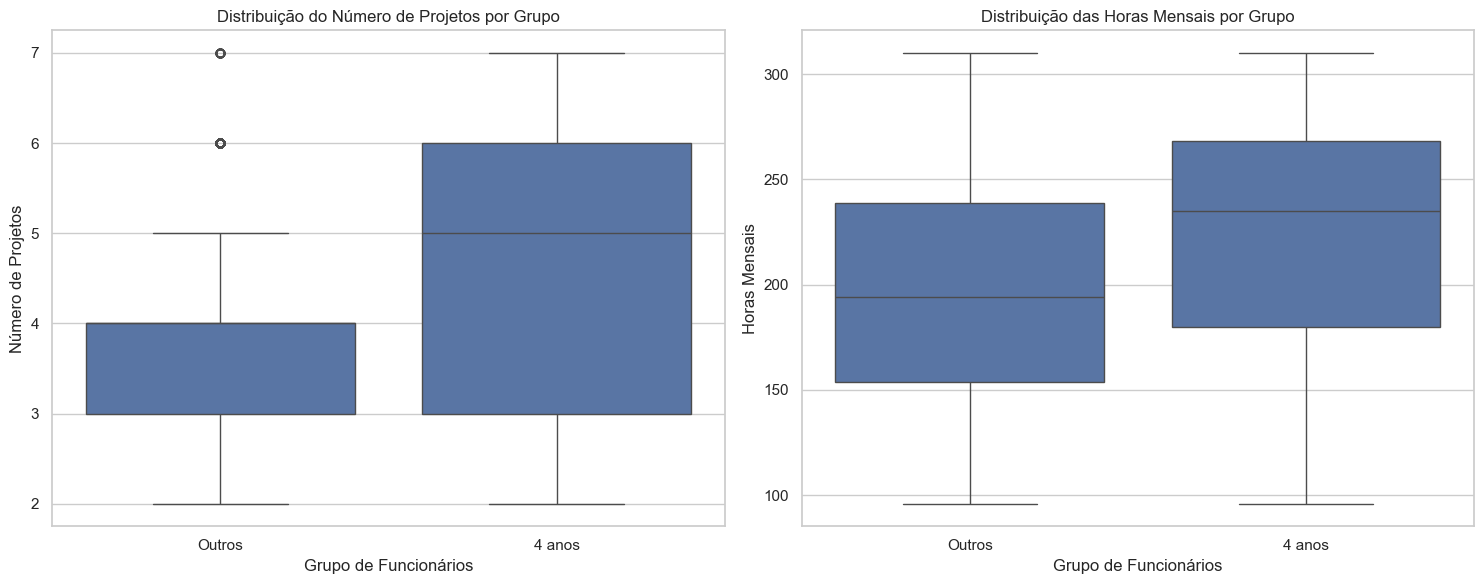

In [16]:
# Boxplots para ver a distribui√ß√£o completa, n√£o apenas as m√©dias
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot 1: N√∫mero de projetos
sns.boxplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Distribui√ß√£o do N√∫mero de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcion√°rios')
axes[0].set_ylabel('N√∫mero de Projetos')

# Boxplot 2: Horas trabalhadas
sns.boxplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Distribui√ß√£o das Horas Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcion√°rios')
axes[1].set_ylabel('Horas Mensais')

plt.tight_layout()
plt.show()

üí° A partir destes dois gr√°ficos √© poss√≠vel afirmar que os funcion√°rios que est√£o h√° 4 anos na empresa possuem uma m√©dia de horas mensais trabalhadas maior do que os demais funcion√°rios. Isso pode ser um indicativo de que esses funcion√°rios est√£o trabalhando mais horas do que os demais e isso pode ter influenciado na sua decis√£o de sair da empresa, por acharem injusto trabalhar mais horas e receber o mesmo sal√°rio ou at√© menor do que os demais funcion√°rios. 

Vamos investigar se h√° uma rela√ß√£o entre esses funcion√°rios e a quantidade de pessoas que saem da empresa.

Taxa de Rotatividade por Grupo:
Funcion√°rios com 4 anos: 34.8%
Outros funcion√°rios: 21.5%


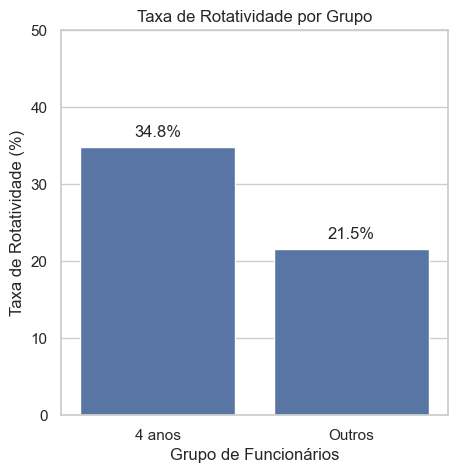

In [17]:
# Calcular a taxa de rotatividade para cada grupo
rotation_rate = data.groupby('group_4_years')['left'].agg(['count', 'sum']).reset_index()
rotation_rate['retention_rate'] = (rotation_rate['count'] - rotation_rate['sum']) / rotation_rate['count'] * 100
rotation_rate['turnover_rate'] = rotation_rate['sum'] / rotation_rate['count'] * 100

print("Taxa de Rotatividade por Grupo:")
print(f"Funcion√°rios com 4 anos: {rotation_rate[rotation_rate['group_4_years'] == '4 anos']['turnover_rate'].iloc[0]:.1f}%")
print(f"Outros funcion√°rios: {rotation_rate[rotation_rate['group_4_years'] == 'Outros']['turnover_rate'].iloc[0]:.1f}%")

# Visualizar
plt.figure(figsize=(5, 5))
sns.barplot(data=rotation_rate, x='group_4_years', y='turnover_rate')
plt.title('Taxa de Rotatividade por Grupo')
plt.ylabel('Taxa de Rotatividade (%)')
plt.xlabel('Grupo de Funcion√°rios')
plt.ylim(0, 50)

# Adicionar valores nas barras
for i, v in enumerate(rotation_rate['turnover_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

‚ö†Ô∏è Pra finalizar a conclus√£o, podemos afirmar que funcion√°rios que est√£o a 4 anos na empresa, tem uma taxa de sa√≠da maior do que os demais funcion√°rios. E o motivo n√£o √© apenas o tempo de empresa mas o fato de que estes colaboradores estarem trabalhando mais e seus sal√°rios n√£o s√£o proporcionais a isso, principalmente se eles se compararem aos outros.

In [18]:
data.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   

   salary group_4_years  
0     low        Outros  
1  medium        Outros

In [27]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

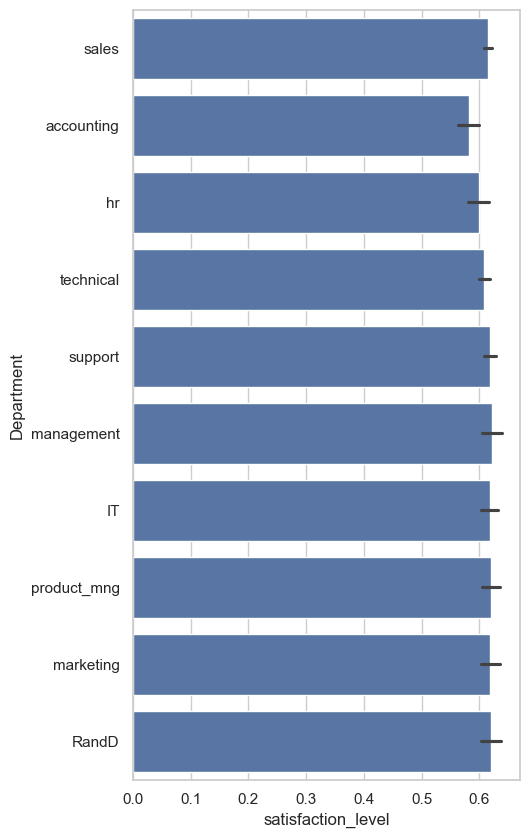

In [38]:
plt.figure(figsize=(5, 10))
sns.barplot(data=data, y='Department', x='satisfaction_level')
plt.show()

Aqui pode-se ver que o n√≠vel de satisfa√ß√£o entre os diferentes setores da empresa √© bem similar. O departamento "Accounting" tem uma satisfa√ß√£o geral menor, por√©m n√£o talvez suficientemente para decretar que h√° um problema.
Por√©m, vamos verificar especificamente para os funcion√°rios que est√£o h√° 4 anos na empresa, para ver se h√° alguma diferen√ßa significativa entre os setores.

In [40]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

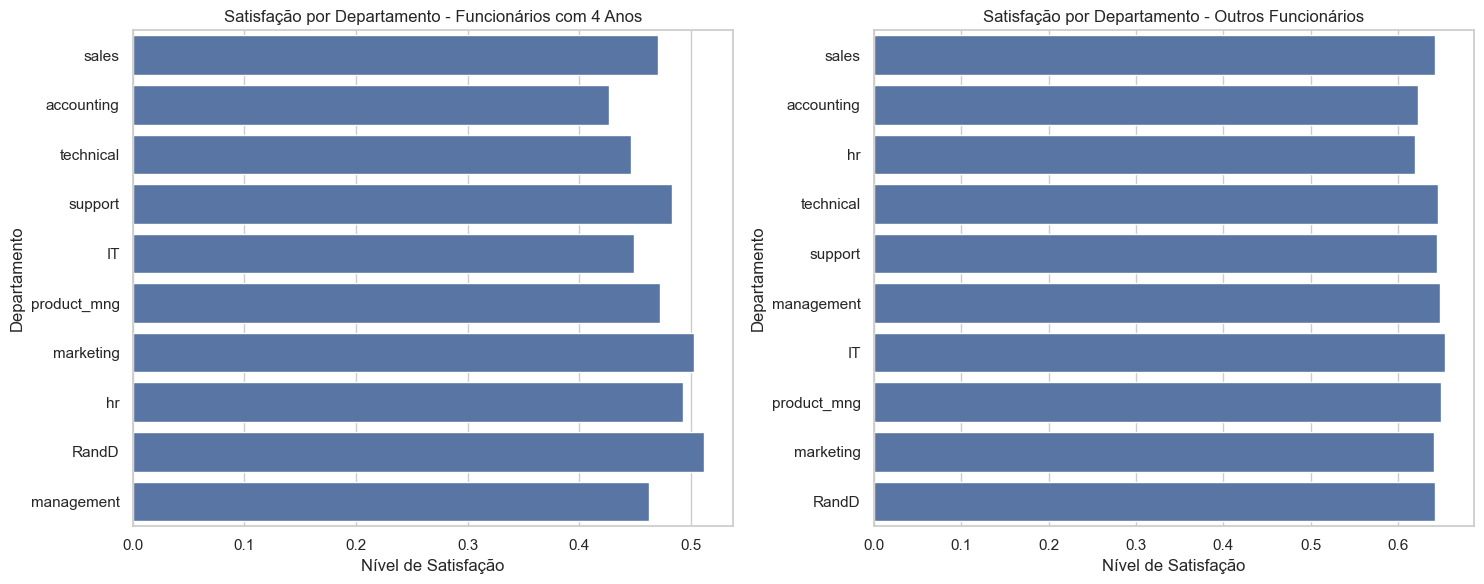

In [47]:
# Comparar satisfa√ß√£o entre funcion√°rios com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Funcion√°rios com 4 anos de empresa
sns.barplot(data=data[data['time_spend_company']==4], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios com 4 Anos')
axes[0].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[0].set_ylabel('Departamento')

# Gr√°fico 2: Outros funcion√°rios (n√£o 4 anos)
sns.barplot(data=data[data['time_spend_company']!=4], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfa√ß√£o por Departamento - Outros Funcion√°rios')
axes[1].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

Aqui, apesar de o n√≠vel de satisfa√ß√£o entre os funcion√°rios que est√£o h√° 4 anos na empresa dentre os setores ser similar, podemos ver que est√° abaixo de `0.5` em praticamente todos os setores. Ent√£o pode-se afirmar que os funcion√°rios que est√£o h√° 4 anos na empresa est√£o insatisfeitos com a empresa, independente do setor.

Por√©m de forma geral, um n√≠vel de satisfa√ß√£o abaixo de `0.8` j√° √© um indicativo de que o funcion√°rio n√£o est√° satisfeito com a empresa. Ent√£o, mesmo que o n√≠vel de satisfa√ß√£o esteja acima de `0.5`, ainda assim √© um indicativo de que os funcion√°rios est√£o insatisfeitos com a empresa.

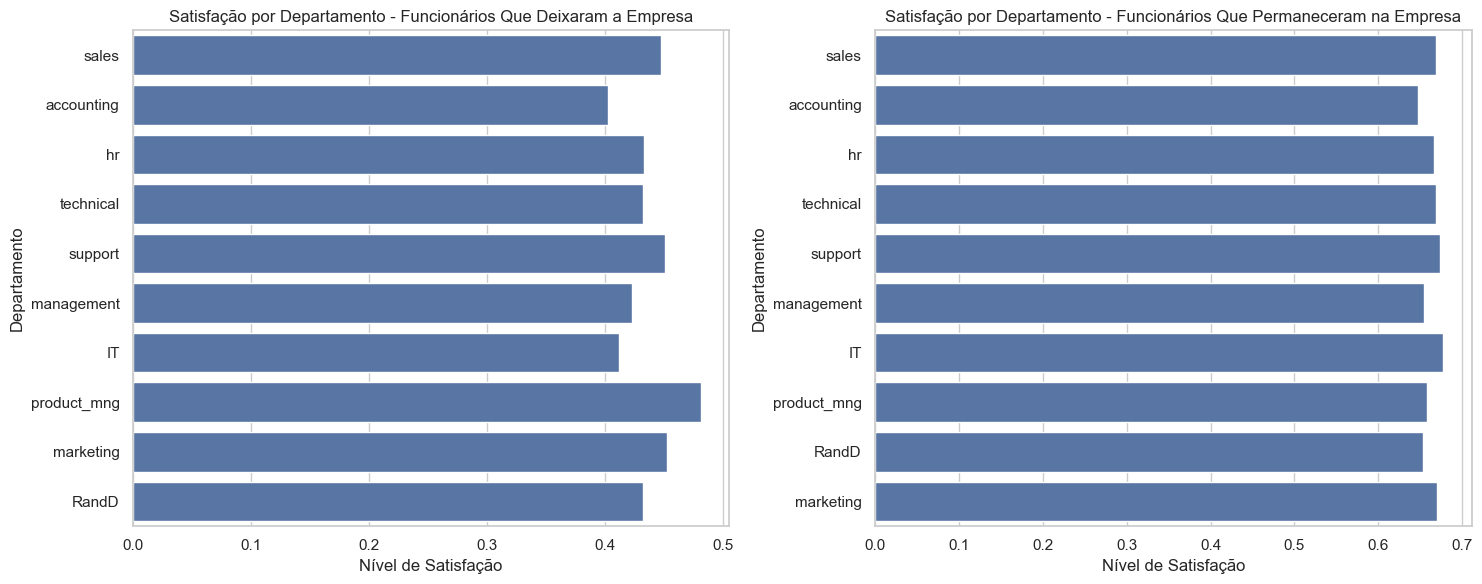

In [55]:
# Comparar satisfa√ß√£o entre funcion√°rios com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Funcion√°rios com 4 anos de empresa
sns.barplot(data=data[data['left']==1], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios Que Deixaram a Empresa')
axes[0].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[0].set_ylabel('Departamento')

# Gr√°fico 2: Outros funcion√°rios (n√£o 4 anos)
sns.barplot(data=data[data['left']!=1], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios Que Permaneceram na Empresa')
axes[1].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

In [56]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary group_4_years  
0     low        Outros  
1  medium        Outros  
2  medium        4 anos  
3     low        Outros  
4     low        Outros

<Axes: xlabel='last_evaluation', ylabel='Count'>

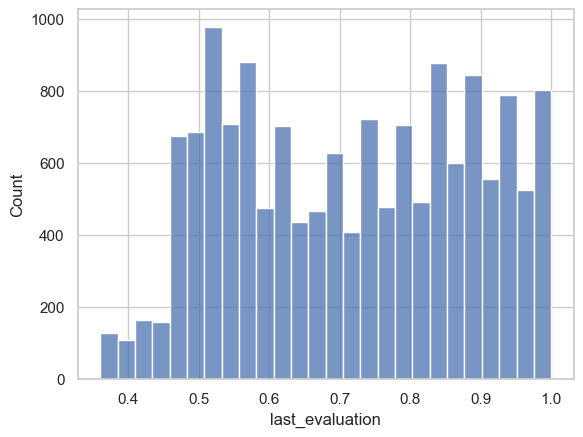

In [59]:
sns.histplot(data=data, x='last_evaluation')